In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train = genfromtxt('./mnist_train.csv', delimiter=',')
test = genfromtxt('./mnist_test.csv', delimiter=',')

In [6]:
y_train = train[:,0]
X_train = train[:,1:]
y_test = test[:,0]
X_test = test[:,1:]

In [8]:
train_images = X_train.reshape(60000, 28, 28, 1)
test_images = X_test.reshape(10000, 28, 28, 1)

In [9]:
plot_train_images = X_train.reshape(60000, 28, 28)
plot_test_images = X_test.reshape(10000, 28, 28)

5.0


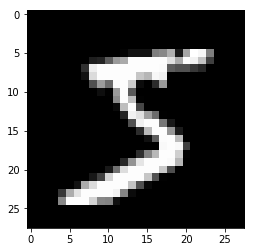

In [11]:
plt.gray()
plt.imshow(plot_train_images[0])
print(y_train[0])

In [12]:
normal_train_images = train_images/255.0
normal_test_images = test_images/255.0

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.01):
            print("\nstopping training as loss reached at {} \n".format(logs.get('loss')))
            self.model.stop_training = True

In [17]:
callback = myCallback()
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(13, 13, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
model.fit(normal_train_images, y_train, epochs=10, callbacks=[callback])

model.evaluate(normal_test_images, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para

[0.029017316527240836, 0.9923]

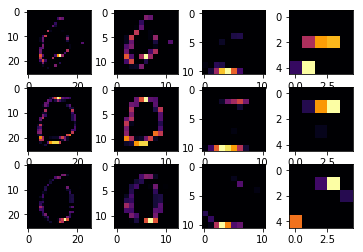

In [23]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=13
CONVOLUTION_NUMBER = 25
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)